# Diabetes Prediction

In [ ]:
import pandas as pd
import seaborn 

# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicat
# dataset ^^^
data = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv", header=0)
data.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [ ]:
#filtered out prediabetes
diabetes= data.query('Diabetes_012 == 0 or Diabetes_012 ==2')


HighBP  HighChol  CholCheck     BMI  Smoker  Stroke  \
Diabetes_012                                                        
0.0           213703    213703     213703  213703  213703  213703   
2.0            35346     35346      35346   35346   35346   35346   

              HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
Diabetes_012                                                       ...   
0.0                         213703        213703  213703   213703  ...   
2.0                          35346         35346   35346    35346  ...   

              AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
Diabetes_012                                                            
0.0                  213703       213703   213703    213703    213703   
2.0                   35346        35346    35346     35346     35346   

              DiffWalk     Sex     Age  Education  Income  
Diabetes_012                                               
0.0             213703  213703  213703     213703  213703  
2.0              35346   35346   35346      35346   35346  

[2 rows x 21 columns]

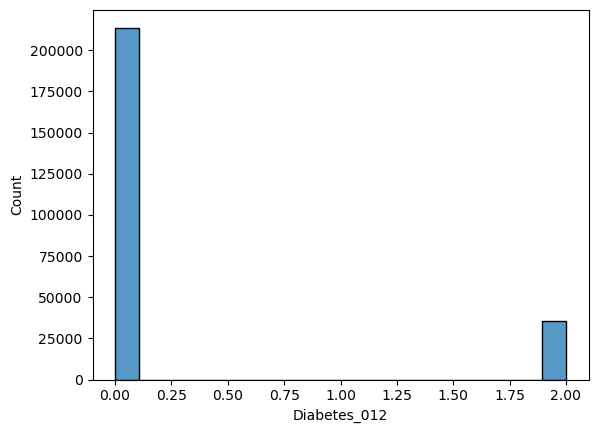

In [3]:
#seaborn.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)
seaborn.histplot(data=diabetes, x= diabetes.Diabetes_012)
#diabetes[diabetes.Diabetes_012==0].shape()
diabetes.groupby(['Diabetes_012']).count()

14% of the respondents in the survey have diabetes. 

<Axes: >

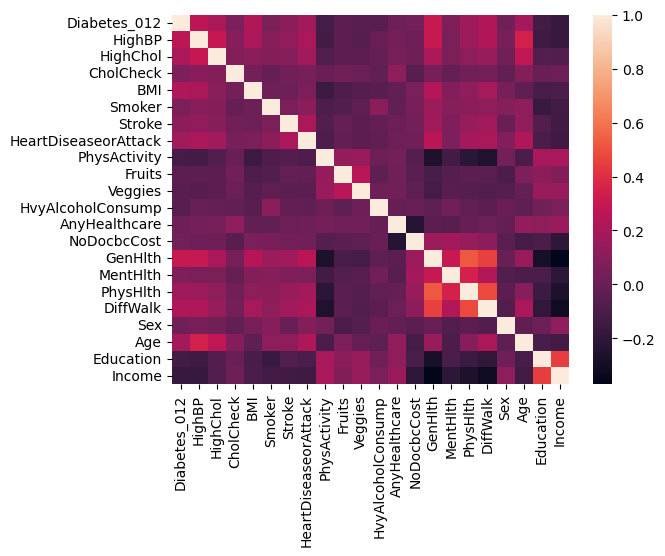

In [4]:
# checking variable correlation (need to avoid multicolinearities)
seaborn.heatmap(diabetes.corr(numeric_only=True))

In [5]:
diabetes['PhysHlth'].corr(diabetes['GenHlth'])  #.52
diabetes['PhysHlth'].corr(diabetes['DiffWalk']) #.478
diabetes['Education'].corr(diabetes['Income']) #.448
diabetes['DiffWalk'].corr(diabetes['GenHlth']) #.456


0.4562922808362167

## Correlation of variables
    The variable listed above have the highest correlation with each other. The variance inflation factor will need to be checked when implementing the logistic regression model. For the rest of the models this correlation should be fine. 

In [21]:
subset_diabetes = diabetes[:-20000]
has_diabetes = subset_diabetes.query('Diabetes_012 ==2')
og_test = diabetes[-20000:]
og_test['Diabetes_012'] = og_test['Diabetes_012'].replace(2,1)
has_diabetes['Diabetes_012'] = has_diabetes['Diabetes_012'].replace(2,1)
no_diabetes= subset_diabetes.query('Diabetes_012 ==0').sample(n=32325)


C:\Users\corkr\AppData\Local\Temp\ipykernel_44896\4193568952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  og_test['Diabetes_012'] = og_test['Diabetes_012'].replace(2,1)
C:\Users\corkr\AppData\Local\Temp\ipykernel_44896\4193568952.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_diabetes['Diabetes_012'] = has_diabetes['Diabetes_012'].replace(2,1)


In [22]:
og_test.groupby(['Diabetes_012']).count()

HighBP  HighChol  CholCheck    BMI  Smoker  Stroke  \
Diabetes_012                                                       
0.0            16979     16979      16979  16979   16979   16979   
1.0             3021      3021       3021   3021    3021    3021   

              HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
Diabetes_012                                                       ...   
0.0                          16979         16979   16979    16979  ...   
1.0                           3021          3021    3021     3021  ...   

              AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
Diabetes_012                                                            
0.0                   16979        16979    16979     16979     16979   
1.0                    3021         3021     3021      3021      3021   

              DiffWalk    Sex    Age  Education  Income  
Diabetes_012                                             
0.0              16979  16979  16979      16979   16979  
1.0               3021   3021   3021       3021    3021  

[2 rows x 21 columns]

## Class Imbalance 
    First, the dataset contains more than enough observations to make an accurate model. For the sake of saving computation time only a portion of it will be used. This will be very beneficial in some of the models included in this project. The dataset also contains a class imbalance in the variable we want to predict which could influence the effectiveness of the models. To mitigate this the resulting sample is 50% of people who have diabetes and 50% of people of do not have diabetes. The final models will need to adjusted to the prior probability and thsi will be done at the end. 

In [8]:
#combine and split
Weighted_Sample = pd.concat([has_diabetes,no_diabetes]).reset_index(drop=True)
Weighted_Sample.tail()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
64645           0.0     0.0       0.0        1.0  22.0     0.0     0.0   
64646           0.0     1.0       1.0        1.0  28.0     1.0     0.0   
64647           0.0     0.0       0.0        1.0  34.0     1.0     0.0   
64648           0.0     0.0       0.0        1.0  32.0     1.0     0.0   
64649           0.0     0.0       1.0        1.0  31.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
64645                   0.0           1.0     1.0  ...            1.0   
64646                   0.0           1.0     0.0  ...            1.0   
64647                   0.0           1.0     0.0  ...            1.0   
64648                   0.0           1.0     1.0  ...            1.0   
64649                   0.0           1.0     0.0  ...            1.0   

       NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
64645          0.0      2.0       0.0       0.0       0.0  1.0  6.0   
64646          0.0      3.0       0.0      20.0       1.0  0.0  7.0   
64647          1.0      3.0       0.0       0.0       0.0  0.0  5.0   
64648          0.0      3.0       3.0       0.0       0.0  0.0  4.0   
64649          0.0      1.0       7.0       2.0       0.0  0.0  5.0   

       Education  Income  
64645        6.0     8.0  
64646        5.0     7.0  
64647        3.0     3.0  
64648        6.0     6.0  
64649        6.0     7.0  

[5 rows x 22 columns]

In [9]:
#Split into training and validation 
# random state set to 1 for reproducibility 
from sklearn.model_selection import train_test_split
train, test = train_test_split(Weighted_Sample, test_size=.3, random_state=1)

In [10]:
# Check is good
test.groupby(['Diabetes_012']).count()

HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
Diabetes_012                                                      
0.0             9586      9586       9586  9586    9586    9586   
1.0             9809      9809       9809  9809    9809    9809   

              HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
Diabetes_012                                                       ...   
0.0                           9586          9586    9586     9586  ...   
1.0                           9809          9809    9809     9809  ...   

              AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  \
Diabetes_012                                                            
0.0                    9586         9586     9586      9586      9586   
1.0                    9809         9809     9809      9809      9809   

              DiffWalk   Sex   Age  Education  Income  
Diabetes_012                                           
0.0               9586  9586  9586       9586    9586  
1.0               9809  9809  9809       9809    9809  

[2 rows x 21 columns]

In [34]:
y = train['Diabetes_012']
x = train.loc[:, train.columns != 'Diabetes_012']

y_test = test['Diabetes_012']
x_test = test.loc[:, test.columns != 'Diabetes_012']

y_og_test = og_test['Diabetes_012']
x_og_test = og_test.loc[:, test.columns != 'Diabetes_012']


In [ ]:
# Evaluation datasets for testing sample 50/50 split and original proportion
Evaluation_50 = pd.DataFrame({
    "Model":[],
    "Accuracy":[], 
    "True Positive":[],
    "True Negative":[], 
    "False Positive":[],
    "False Negative":[],

})

Evaluation_og = pd.DataFrame({
    "Model":[],
    "Accuracy":[], 
    "True Positive":[],
    "True Negative":[], 
    "False Positive":[],
    "False Negative":[],

})


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
print(vif_data)

                 Feature        VIF
0                 HighBP   3.078327
1               HighChol   2.486143
2              CholCheck  32.413457
3                    BMI  18.375914
4                 Smoker   2.040709
5                 Stroke   1.161320
6   HeartDiseaseorAttack   1.393137
7           PhysActivity   3.912245
8                 Fruits   2.872079
9                Veggies   5.168404
10     HvyAlcoholConsump   1.065413
11         AnyHealthcare  22.019137
12           NoDocbcCost   1.222369
13               GenHlth  13.018666
14              MentHlth   1.517294
15              PhysHlth   2.246830
16              DiffWalk   2.114165
17                   Sex   2.007250
18                   Age  12.417171
19             Education  27.762269
20                Income  12.573609


In [51]:
# removed variables with variance inflation factors higher than 10 
x1 = x.drop('Education', axis=1)
x1 = x1.drop('CholCheck', axis=1)
x1 = x1.drop('AnyHealthcare', axis=1)
x1 = x1.drop('BMI', axis=1)

x1_test = x_test.drop('Education', axis=1)
x1_test = x1_test.drop('CholCheck', axis=1)
x1_test = x1_test.drop('AnyHealthcare', axis=1)
x1_test = x1_test.drop('BMI', axis=1)

og1_test = x_og_test.drop('Education', axis=1)
og1_test = og1_test.drop('CholCheck', axis=1)
og1_test = og1_test.drop('AnyHealthcare', axis=1)
og1_test = og1_test.drop('BMI', axis=1)


In [47]:
#logistic reg
import statsmodels.api as sm

x1 = sm.add_constant(x1)
log_model = sm.Logit(y,x1)
log_results = log_model.fit()

print(log_results.summary())

Optimization terminated successfully.
         Current function value: 0.530559
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           Diabetes_012   No. Observations:                45255
Model:                          Logit   Df Residuals:                    45237
Method:                           MLE   Df Model:                           17
Date:                Fri, 01 Nov 2024   Pseudo R-squ.:                  0.2346
Time:                        11:01:21   Log-Likelihood:                -24010.
converged:                       True   LL-Null:                       -31368.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.2504      0.077    -42.388      0.000      -3.401      -3.100

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
x1_test = sm.add_constant(x1_test)

log_pred_prob = log_results.predict(x1_test)
# Convert probabilities to binary predictions
log_pred = [1 if x >= 0.5 else 0 for x in log_pred_prob]

#Evaluation
conf_matrix_log = confusion_matrix(y_test, log_pred)

accuracy_log = accuracy_score(y_test, log_pred)
print("Confusion Matrix:")
print(conf_matrix_log)



tn, fp, fn, tp = conf_matrix_log.ravel()


Evaluation_50 = Evaluation_50._append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_log,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

#Original Dataset testing
og1_test = sm.add_constant(og1_test)
log_model = sm.Logit(y_test,x1_test)
log_pred_prob = log_results.predict(og1_test)
# Convert probabilities to binary predictions
log_pred = [1 if x >= 0.5 else 0 for x in log_pred_prob]

conf_matrix_log2 = confusion_matrix(y_og_test, log_pred)

accuracy_log = accuracy_score(y_og_test, log_pred)
tn, fp, fn, tp = conf_matrix_log2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_log,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)


Confusion Matrix:
[[6894 2692]
 [2433 7376]]


True positive 7475      false negative: 3052
False postive: 2636     True Negative: 8045


The logistic model has a low Psuedo R squared. 
NoDocBcCost could be removed with a p-value of .944
Veggies could be removed with a p-value of .492




In [ ]:
#decision trees
from sklearn.tree import DecisionTreeClassifier
gini_tree = DecisionTreeClassifier(random_state=1, criterion="gini")
gini_tree.fit(x, y)
gini_pred = gini_tree.predict(x_test)

#Evaluation
accuracy = accuracy_score(y_test, gini_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
gini_conf = confusion_matrix(y_test, gini_pred)
print(gini_conf)
print("\nClassification Report:")
print(classification_report(y_test, gini_pred))




tn, fp, fn, tp = gini_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "Decision Tree GINI",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

#Original dataset testing
gini_pred = gini_tree.predict(x_og_test)
accuracy = accuracy_score(y_og_test, gini_pred)
gini_conf2 = confusion_matrix(y_og_test, gini_pred)

tn, fp, fn, tp = gini_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Decision Tree GINI",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.67

Confusion Matrix:
[[6453 3133]
 [3348 6461]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.67      9586
         1.0       0.67      0.66      0.67      9809

    accuracy                           0.67     19395
   macro avg       0.67      0.67      0.67     19395
weighted avg       0.67      0.67      0.67     19395



In [ ]:
entropy_tree = DecisionTreeClassifier(random_state=1, criterion="entropy")
entropy_tree.fit(x,y)
entropy_pred = entropy_tree.predict(x_test)

#Evaluation 
accuracy = accuracy_score(y_test, entropy_pred)
print(f"Accuracy: {accuracy:.2f}")


print("\nConfusion Matrix:")
entropy_conf = confusion_matrix(y_test, entropy_pred)
print(confusion_matrix(y_test, entropy_pred))

print("\nClassification Report:")
print(classification_report(y_test, entropy_pred))


tn, fp, fn, tp = entropy_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "Decision Tree Entropy",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

# Original dataset testing
entropy_pred = entropy_tree.predict(x_og_test)
accuracy = accuracy_score(y_og_test, entropy_pred)
entropy_conf2 = confusion_matrix(y_og_test, entropy_pred)
tn, fp, fn, tp = entropy_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Decision Tree Entropy",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.66

Confusion Matrix:
[[6374 3212]
 [3412 6397]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66      9586
         1.0       0.67      0.65      0.66      9809

    accuracy                           0.66     19395
   macro avg       0.66      0.66      0.66     19395
weighted avg       0.66      0.66      0.66     19395



In [ ]:
#Hyper parameter tuning for neural network classifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


# parameter grid
param_grid = {
    'hidden_layer_sizes': [(5), (10, 5), (10, 5, 2)],
    'alpha': [0.001, 0.01, 0.1]
}


grid_search = GridSearchCV(MLPClassifier(max_iter=200, random_state=1), param_grid, cv=5)
grid_search.fit(x, y)

# Best parameters and its score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (10, 5, 2)}
Best cross-validation score: 0.7532131030454424


In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(activation= 'relu', max_iter=200,
                    hidden_layer_sizes=(10,5, 2), random_state=1, alpha=.01)

nn.fit(x, y)

nn_pred = nn.predict(x_test)
# Evaluation
accuracy = accuracy_score(y_test, nn_pred)
print("Accuracy:", accuracy_score(y_test, nn_pred))
nn_conf  = confusion_matrix(y_test, nn_pred)
print(nn_conf)
print("Classification Report:\n", classification_report(y_test, nn_pred))

tn, fp, fn, tp = nn_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "Neural Network",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

#original Dataset test
nn_pred = nn.predict(x_og_test)
# Print accuracy
accuracy = accuracy_score(y_og_test, nn_pred)
nn_conf2  = confusion_matrix(y_og_test, nn_pred)

tn, fp, fn, tp = nn_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Neural Network",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.7518948182521268
[[6925 2661]
 [2151 7658]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.72      0.74      9586
         1.0       0.74      0.78      0.76      9809

    accuracy                           0.75     19395
   macro avg       0.75      0.75      0.75     19395
weighted avg       0.75      0.75      0.75     19395



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradb_clf = GradientBoostingClassifier(
    n_estimators=25,    # Number of boosting stages
    learning_rate=0.1,   # Step size to control each model's contribution
    max_depth=3,         # Depth of each tree
    random_state=1
)

# Training
gradb_clf.fit(x, y)

# Predicting and Evaluation
gradb_pred = gradb_clf.predict(x_test)
accuracy = accuracy_score(y_test, gradb_pred)
print("Accuracy:", accuracy_score(y_test, gradb_pred))
gradb_conf = confusion_matrix(y_test,gradb_pred )
print("Classification Report:\n", classification_report(y_test, gradb_pred))

tn, fp, fn, tp = gradb_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

# Original dataset test
gradb_pred = gradb_clf.predict(x_og_test)
accuracy = accuracy_score(y_og_test, gradb_pred)
gradb_conf2 = confusion_matrix(y_og_test,gradb_pred )
tn, fp, fn, tp = gradb_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Gradient Boosting",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.7445217839649394
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.72      0.73      9586
         1.0       0.74      0.77      0.75      9809

    accuracy                           0.74     19395
   macro avg       0.75      0.74      0.74     19395
weighted avg       0.74      0.74      0.74     19395



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(
    
    n_estimators=50,      # Number of base estimators
    max_samples=0.8,      # Proportion of dataset to use per subset (80% here)
    max_features=1.0,     # Proportion of features to use per subset (all features)
    random_state=1
)

# Training
bagging_clf.fit(x, y)

# Prediction
y_pred = bagging_clf.predict(x_test)

# Evaluation
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))
bag_conf = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

tn, fp, fn, tp = bag_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "Bagging",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

y_pred = bagging_clf.predict(x_og_test)
accuracy = accuracy_score(y_og_test, y_pred)
bag_conf2 = confusion_matrix(y_og_test, y_pred)

tn, fp, fn, tp = bag_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Bagging",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.7309615880381541
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.71      0.72      9586
         1.0       0.72      0.76      0.74      9809

    accuracy                           0.73     19395
   macro avg       0.73      0.73      0.73     19395
weighted avg       0.73      0.73      0.73     19395



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#
label_encoder = LabelEncoder()
x_categorical = x.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = x.select_dtypes(exclude=['object']).values
x_adj = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

x_categorical = x_test.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = x_test.select_dtypes(exclude=['object']).values
x_test_adj = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values


rf = RandomForestRegressor(n_estimators=50, random_state=1, oob_score=True)


rf.fit(x_adj, y)

rf_pred = rf.predict(x_test_adj)

#Evaluation
rf_pred = [1 if x >= 0.5 else 0 for x in rf_pred]
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy: {accuracy}")
rf_conf = confusion_matrix(y_test, rf_pred)
print(confusion_matrix(y_test, rf_pred))

tn, fp, fn, tp = rf_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

#Original Data testing
x_categorical = x_og_test.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = x_og_test.select_dtypes(exclude=['object']).values
x_og_test_adj = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
#evaluation
rf_pred = rf.predict(x_og_test_adj)
rf_pred = [1 if x >= 0.5 else 0 for x in rf_pred]
accuracy = accuracy_score(y_og_test, rf_pred)
rf_conf2 = confusion_matrix(y_og_test, rf_pred)

tn, fp, fn, tp = rf_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "Random Forest",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

Accuracy: 0.7303944315545243
[[6571 3015]
 [2214 7595]]


In [ ]:
#k nearest neighbors
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)
scaled_features = scaler.transform(x)

df_feat = pd.DataFrame(scaled_features,
					columns=x.columns[:])
df_feat.head()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x, y)
knn_pred = knn.predict(x_test)

#Evaluation
knn_conf = confusion_matrix(y_test, knn_pred)
print(confusion_matrix(y_test, knn_pred))
accuracy = accuracy_score(y_test, knn_pred)
print(classification_report(y_test, knn_pred))

tn, fp, fn, tp = knn_conf.ravel()

Evaluation_50 = Evaluation_50._append({
    "Model": "KNN",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)

#Original data testing
knn_pred = knn.predict(x_og_test)
knn_conf2 = confusion_matrix(y_og_test, knn_pred)
accuracy = accuracy_score(y_og_test, knn_pred)


tn, fp, fn, tp = knn_conf2.ravel()

Evaluation_og = Evaluation_og._append({
    "Model": "KNN",
    "Accuracy": accuracy,
    "True Positive": tp,
    "False Positive": fp,
    "False Negative": fn,
    "True Negative": tn
}, ignore_index= True)


[[6267 3319]
 [3302 6507]]
              precision    recall  f1-score   support

         0.0       0.65      0.65      0.65      9586
         1.0       0.66      0.66      0.66      9809

    accuracy                           0.66     19395
   macro avg       0.66      0.66      0.66     19395
weighted avg       0.66      0.66      0.66     19395



In [ ]:
Evaluation_50

Model  Accuracy  True Positive  True Negative  \
0    Logistic Regression  0.735757         7376.0         6894.0   
1     Decision Tree GINI  0.665842         6461.0         6453.0   
2  Decision Tree Entropy  0.658469         6397.0         6374.0   
3         Neural Network  0.751895         7658.0         6925.0   
4      Gradient Boosting  0.744522         7572.0         6868.0   
5                Bagging  0.730962         7411.0         6766.0   
6          Random Forest  0.730394         7595.0         6571.0   
7                    KNN  0.658623         6507.0         6267.0   

   False Positive  False Negative  
0          2692.0          2433.0  
1          3133.0          3348.0  
2          3212.0          3412.0  
3          2661.0          2151.0  
4          2718.0          2237.0  
5          2820.0          2398.0  
6          3015.0          2214.0  
7          3319.0          3302.0

In [62]:
Evaluation_og

Model  Accuracy  True Positive  True Negative  \
0    Logistic Regression   0.70455         2331.0        11760.0   
1     Decision Tree GINI   0.64560         1963.0        10949.0   
2  Decision Tree Entropy   0.65375         1969.0        11106.0   
3         Neural Network   0.71625         2427.0        11898.0   
4      Gradient Boosting   0.71050         2398.0        11812.0   
5                Bagging   0.69260         2343.0        11509.0   
6          Random Forest   0.68040         2386.0        11222.0   
7                    KNN   0.64735         2035.0        10912.0   

   False Positive  False Negative  
0          5219.0           690.0  
1          6030.0          1058.0  
2          5873.0          1052.0  
3          5081.0           594.0  
4          5167.0           623.0  
5          5470.0           678.0  
6          5757.0           635.0  
7          6067.0           986.0

## Evaluation 
    The models preformed fairly well but need more work or better variables to increase accuracy. 
